In [1]:
import os
from MOLLI_fit import *
import numpy as np
from load_cppimg import load_img

path = '../exp_result_noflow/T1_1000_2000'



In [2]:
def MF_MAGIR_fit(path,show_MOLLI=False,show_T1=False):
    MOLLI_readout_img=[]
    MOLLI_readout_t = np.array( [200, 1200, 2200, 3200, 4200, 300, 1300, 2300]) * 1e-3
    for i in range(8):
        MOLLI_readout_img.append(load_img(
            path,i))
    MOLLI_readout_img = np.asarray(MOLLI_readout_img)

    # print(MOLLI_readout_img[:, 15, 15])
    if show_MOLLI:
        plt.figure(figsize=(18,8))
        for i in range(8):
            plt.subplot(2, 4, i+1)
            plt.imshow(MOLLI_readout_img[i])
            plt.colorbar(shrink=0.7)
        plt.show()

    T1_result = np.zeros(MOLLI_readout_img[0].shape)

    for x, y in tqdm(np.ndindex(MOLLI_readout_img[0].shape)):
        # T1_star, T1, A, B = MAGIR(
        T1_star, T1, A, B = MF_MAGIR(
            MOLLI_readout_t, MOLLI_readout_img[:, x, y])
        T1_result[x, y] = T1
    if show_T1:
        plt.figure()
        plt.imshow(T1_result)
        plt.colorbar()
        plt.clim(0,2)
    return MOLLI_readout_img,T1_result
def get_mask(k=64,x=4,y=4,radius=np.floor(18/256*64),dx=-1,dy=-2):
    print(radius)
    mask_list = []
    # plt.figure(figsize=(10,10))
    for i in range(x):
        for j in range(y):
            mask = np.ones((k,k),dtype=bool)
            for m in range(k):
                for n in range(k):
                    if (m-(i+0.5)*k/x-dx)**2 + (n-(j+0.5)*k/y-dy)**2 < radius**2:
                        mask[m,n] = 0
            # plt.subplot(x,y,i*y+j+1)
            # plt.imshow(mask)
            mask_list.append(mask)
    return mask_list

4.5


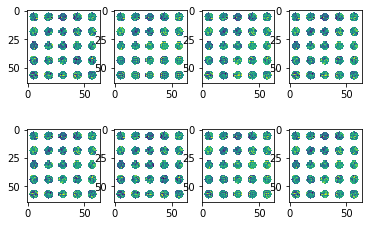

In [3]:
mask_list = get_mask(x=5,y=5,radius=18./256*64,dx=-1,dy=-1)
MOLLI_readout_img = []
for i in range(8):
    MOLLI_readout_img.append(load_img(
        path, i))
MOLLI_readout_img = np.asarray(MOLLI_readout_img)

for mask in mask_list:
    MOLLI_img_list = []
    for i in range(8):
        msked_img = np.ma.masked_array(MOLLI_readout_img[i],mask=mask)
        # plt.subplot(2,4,i+1)
        # plt.imshow(msked_img)
        MOLLI_img_list.append(msked_img)
    


